In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("../data/Credit_Card_Applications.csv")
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
X, y = df.iloc[:, :-1].to_numpy(), df.iloc[:, -1].to_numpy()

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [6]:
from minisom import MiniSom

In [7]:
som = MiniSom(x=10, y=10, input_len=X.shape[1], random_seed=42)

In [8]:
som.random_weights_init(X)

In [9]:
som.train_random(X, 100)

In [10]:
import seaborn as sns

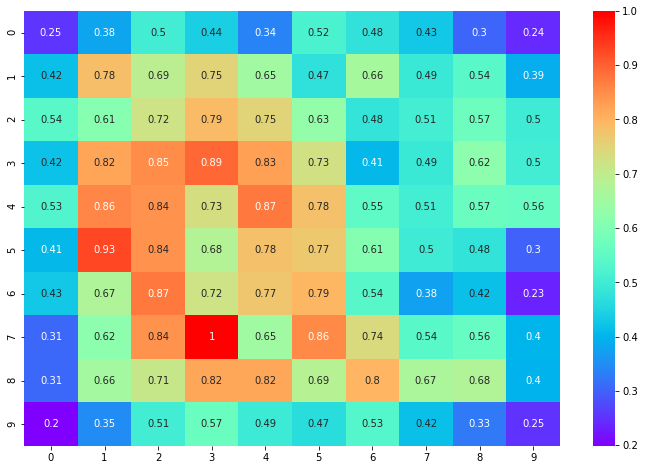

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(som.distance_map().T, annot=True, cmap="rainbow");

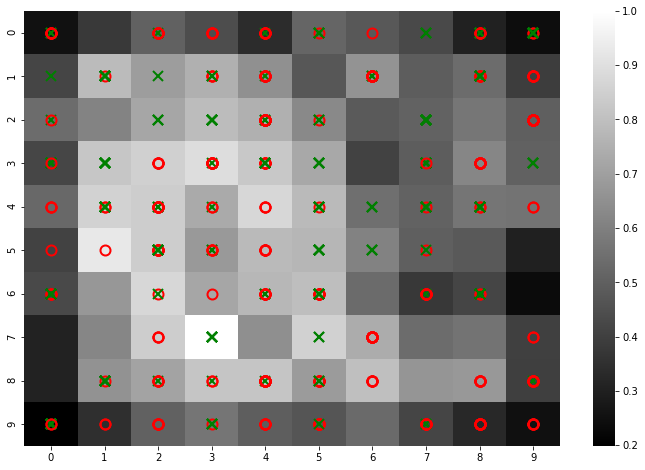

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(som.distance_map().T, cmap="gray")

markers = ["o", "x"]
colors = ["r", "g"]
for i, x in enumerate(X):
    w = som.winner(x)
    plt.plot(
        w[0] + 0.5,
        w[1] + 0.5,
        markers[y[i]],
        markeredgecolor=colors[y[i]],
        markerfacecolor="None",
        markersize=10,
        markeredgewidth=2,
    )

In [13]:
mappings = som.win_map(X)

In [14]:
frauds = mappings[(5, 6)]

In [15]:
frauds = sc.inverse_transform(frauds)

In [16]:
print("Customer IDs:\n", frauds[:, 0])

Customer IDs:
 [15786237. 15767358. 15567839. 15579583. 15642336. 15740487. 15811742.
 15702571. 15622083. 15646190. 15715907. 15768342. 15748532. 15689692.
 15672357. 15788634.]
